In [1]:
%matplotlib inline

import os
from glob import glob
import numpy as np
import xarray as xr
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')

import string
alphabet=list(string.ascii_lowercase)

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

In [2]:
cases={}
cases['ctrl']={}
cases['tunOnly']={}
cases['hpOnly']={}
cases['tun_hp']={}

for i in cases:
    cases[i]['machine_target']='gfdl.ncrc4-intel19-prod'
    if i == 'ctrl':
        cases[i]['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'
    else:
        cases[i]['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2'
            
cases['ctrl']['name']='OM4p5_CORE2_IAF_gzCOBALT-013022_cy5'
cases['tunOnly']['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_cy5'
cases['hpOnly']['name']='OM4p5_CORE2_IAF_gzCOBALT-hp_cy5'
cases['tun_hp']['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5'

print(cases)

{'ctrl': {'machine_target': 'gfdl.ncrc4-intel19-prod', 'path_root': '/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT', 'name': 'OM4p5_CORE2_IAF_gzCOBALT-013022_cy5'}, 'tunOnly': {'machine_target': 'gfdl.ncrc4-intel19-prod', 'path_root': '/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2', 'name': 'OM4p5_CORE2_IAF_gzCOBALT-tun_cy5'}, 'hpOnly': {'machine_target': 'gfdl.ncrc4-intel19-prod', 'path_root': '/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2', 'name': 'OM4p5_CORE2_IAF_gzCOBALT-hp_cy5'}, 'tun_hp': {'machine_target': 'gfdl.ncrc4-intel19-prod', 'path_root': '/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2', 'name': 'OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5'}}


In [3]:
grid_file=os.path.join(cases['ctrl']['path_root'], cases['ctrl']['name'], cases['ctrl']['machine_target'], 'pp')+'/ocean_annual/ocean_annual.static.nc'
#grid=xr.open_dataset(grid_file)
grid = xr.open_dataset('/work/jyl/tmp/ocean_static.nc')

In [4]:
import pandas as pd
pd.DataFrame.from_dict(cases).T

,machine_target,path_root,name
ctrl,gfdl.ncrc4-intel19-prod,/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT,OM4p5_CORE2_IAF_gzCOBALT-013022_cy5
tunOnly,gfdl.ncrc4-intel19-prod,/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2,OM4p5_CORE2_IAF_gzCOBALT-tun_cy5
hpOnly,gfdl.ncrc4-intel19-prod,/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2,OM4p5_CORE2_IAF_gzCOBALT-hp_cy5
tun_hp,gfdl.ncrc4-intel19-prod,/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2,OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5


# Read in Files
Use expc from ocean_cobalt_omip_tracers_month_z only

In [5]:
diagTypes_mon = 'ocean_cobalt_omip_tracers_month_z' 
pp_dates='1988-2007'

In [6]:
case='ctrl'

files_mon = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diagTypes_mon + '.' + pp_dates + '*.nc')

expc_ctrl = xr.open_mfdataset(files_mon, combine='by_coords').expc

In [7]:
case='tunOnly'

files_mon = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diagTypes_mon + '.' + pp_dates + '*.nc')

expc_tun = xr.open_mfdataset(files_mon, combine='by_coords').expc

In [8]:
case='hpOnly'

files_mon = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diagTypes_mon + '.' + pp_dates + '*.nc')

expc_hp = xr.open_mfdataset(files_mon, combine='by_coords').expc

In [9]:
case='tun_hp'

files_mon = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diagTypes_mon + '.' + pp_dates + '*.nc')

expc_tun_hp = xr.open_mfdataset(files_mon, combine='by_coords').expc

In [10]:
days_in_month = xr.DataArray([31,28,31,30,31,30,31,31,30,31,30,31], coords={'time':expc_ctrl.time}, dims='time')
days_in_month_wgts=days_in_month / days_in_month.mean()
days_in_month_wgts

<xarray.DataArray (time: 12)>
array([1.01917808, 0.92054795, 1.01917808, 0.98630137, 1.01917808,
       0.98630137, 1.01917808, 1.01917808, 0.98630137, 1.01917808,
       0.98630137, 1.01917808])
Coordinates:
  * time     (time) object 1999-07-18 00:00:00 ... 2000-06-17 00:00:00

In [11]:
expc_ctrl

<xarray.DataArray 'expc' (time: 12, z_l: 35, yh: 576, xh: 720)>
dask.array<concatenate, shape=(12, 35, 576, 720), dtype=float32, chunksize=(1, 35, 576, 720), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * time     (time) object 1999-07-18 00:00:00 ... 2000-06-17 00:00:00
Attributes:
    long_name:      Sinking Particulate Organic Carbon Flux
    units:          mol m-2 s-1
    cell_measures:  volume: volcello area: areacello
    standard_name:  sinking_mole_flux_of_particulate_organic_matter_expressed...
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean within mont...
    time_avg_info:  average_T1,average_T2,average_DT

# Read in Obs

In [12]:
remin_file='/work/jyl/validation_data/Laufkotter_Remin/Dinauer_2022_compilation_withSeasons.csv'
remin=pd.read_csv(remin_file)
remin

,Station,Latitude (DD),Longitude (DD),Depth (m),Normalized POC Flux,Season,Data Source
0,Iceland,62.5,-24.5,150,1.000,JJA,Marsay et al. (2015)
1,Iceland,62.5,-24.5,400,0.536,JJA,Marsay et al. (2015)
2,Irminger,60.5,-31.5,150,1.000,JJA,Marsay et al. (2015)
3,Irminger,60.5,-31.5,400,0.339,JJA,Marsay et al. (2015)
4,EXPORTS I,50.5,-145.5,150,1.000,JAS,EXPORTSNP (https://seabass.gsfc.nasa.gov/)
...,...,...,...,...,...,...,...
113,MAUR,10.5,-20.5,600,0.297,MAM,Engel et al. (2017)
114,PERU,-15.5,-75.5,400,1.000,JJA,Martin et al. (1987)
115,PERU,-15.5,-75.5,600,0.822,JJA,Martin et al. (1987)
116,PERU,-15.5,-75.5,900,0.795,JJA,Martin et al. (1987)


In [13]:
pd.unique(remin.Season)

array(['JJA', 'JAS', 'ALL', 'MAM SON DJF', 'SON', 'MAM', 'DJF'],
      dtype=object)

In [14]:
pd.unique(remin.Station)

array(['Iceland', 'Irminger', 'EXPORTS I', 'EXPORTS II', 'PAP', 'K2',
       'VERTEX 1', 'VERTEX 2', 'VERTEX 4', 'BATS', 'VERTEX 5', 'NASG',
       'ALOHA', 'MX', 'VERTEX II', 'VERTEX III', 'Arabian I', 'NPEC',
       'GUAT', 'Arabian II', 'MAUR', 'PERU'], dtype=object)

In [15]:
Season_to_Months={}
Season_to_Months['ALL']=[*range(0,12,1)]
Season_to_Months['DJF']=[11, 0, 1]
Season_to_Months['MAM']=[*range(2,5)]
Season_to_Months['JJA']=[*range(5,8)]
Season_to_Months['JAS']=[*range(6,9)]
Season_to_Months['SON']=[*range(8,11)]
Season_to_Months['MAM SON DJF']=[*range(0,5)]
Season_to_Months['MAM SON DJF'].extend([*range(8,12)])

In [16]:
def lon_adjust(lon):
    if((lon > 60) & (lon < 180)):
        lon=lon-360
    return(lon)

# Observations

In [17]:
def extract_loc_and_plot(stn):
    # extract locations from obs
    lon=lon_adjust(remin['Longitude (DD)'].where(remin.Station==stn).dropna().unique()[0])
    lat=remin['Latitude (DD)'].where(remin.Station==stn).dropna().unique()[0]
    time_idx=Season_to_Months[remin['Season'].where(remin.Station==stn).dropna().unique()[0]]
    norm_depth=remin['Depth (m)'].where(remin.Station==stn).dropna().values[0]

    # extract grid cell from models
    stn_val_ctrl = expc_ctrl.sel(xh=lon, yh=lat, method='nearest').isel(time=time_idx).mean(dim='time')
    stn_val_tun = expc_tun.sel(xh=lon, yh=lat, method='nearest').isel(time=time_idx).mean(dim='time')
    stn_val_hp = expc_hp.sel(xh=lon, yh=lat, method='nearest').isel(time=time_idx).mean(dim='time')
    stn_val_tun_hp = expc_tun_hp.sel(xh=lon, yh=lat, method='nearest').isel(time=time_idx).mean(dim='time')

    # scale models by the normalization depth from the obs
    stn_val_ctrl = stn_val_ctrl / stn_val_ctrl.sel(z_l=norm_depth, method='nearest')
    stn_val_tun = stn_val_tun / stn_val_tun.sel(z_l=norm_depth, method='nearest')
    stn_val_hp = stn_val_hp / stn_val_hp.sel(z_l=norm_depth, method='nearest')
    stn_val_tun_hp = stn_val_tun_hp / stn_val_tun_hp.sel(z_l=norm_depth, method='nearest')
    
    # plot
    plt.plot(stn_val_ctrl.values,stn_val_ctrl.z_l.values)
    plt.plot(stn_val_tun.values,stn_val_tun.z_l.values)
    plt.plot(stn_val_hp.values,stn_val_hp.z_l.values)
    plt.plot(stn_val_tun_hp.values,stn_val_tun_hp.z_l.values)

    plt.scatter(x=remin.where(remin.Station==stn)['Normalized POC Flux'],y=remin.where(remin.Station==stn)['Depth (m)'], marker='o', color='black')
    plt.ylabel('Depth (m)')
    plt.xlabel('Normalized POC Flux')
    plt.legend(['Control','Tun Only', 'Fish Only', 'Combined', 'Obs'])
    plt.title(stn)
    plt.gca().invert_yaxis()

In [18]:
locs=remin.drop_duplicates(subset=['Station','Longitude (DD)','Latitude (DD)'])
locs=locs[['Station','Longitude (DD)','Latitude (DD)']]
locs=locs.reset_index(drop=True).set_index('Station')
locs

,Longitude (DD),Latitude (DD)
Station,,
Iceland,-24.5,62.5
Irminger,-31.5,60.5
EXPORTS I,-145.5,50.5
EXPORTS II,-144.5,50.5
PAP,-16.5,48.5
K2,160.5,47.5
VERTEX 1,-122.5,36.5
VERTEX 2,-128.5,35.5
VERTEX 4,-139.5,33.5


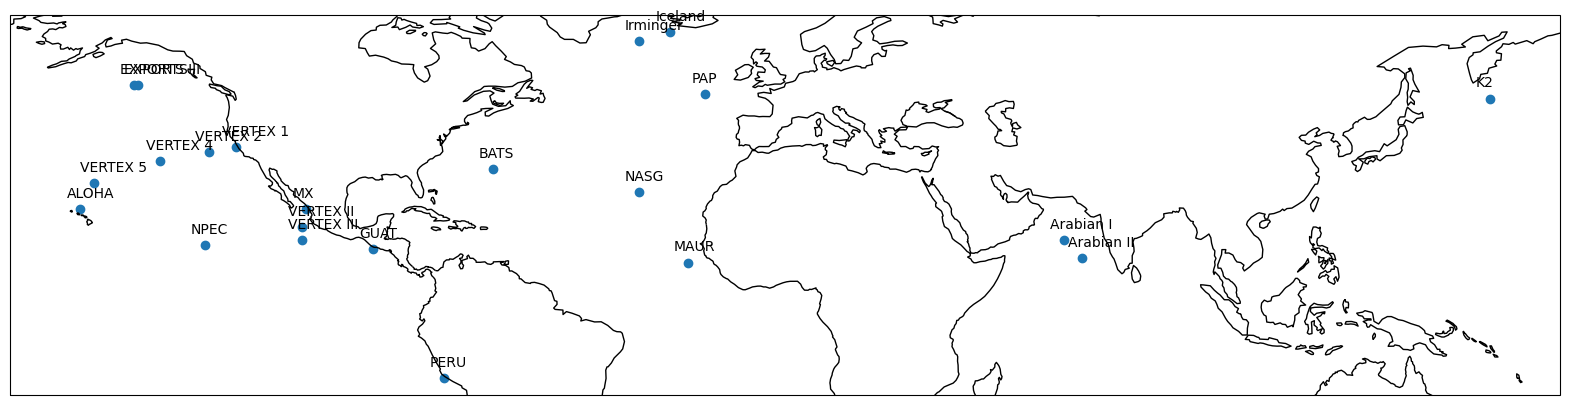

In [19]:
plt.figure(figsize=(20,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.scatter(x=locs['Longitude (DD)'], y=locs['Latitude (DD)'])


for x, y in locs.iterrows():
    ax.annotate(x, y,
                xytext=(-10,8), textcoords='offset points')

### Combine a couple stations?

In [20]:
remin.where(remin.Station=="EXPORTS II").dropna()

,Station,Latitude (DD),Longitude (DD),Depth (m),Normalized POC Flux,Season,Data Source
8,EXPORTS II,50.5,-144.5,150.0,1.000,JAS,EXPORTSNP (https://seabass.gsfc.nasa.gov/)
9,EXPORTS II,50.5,-144.5,200.0,0.994,JAS,EXPORTSNP (https://seabass.gsfc.nasa.gov/)
10,EXPORTS II,50.5,-144.5,300.0,0.710,JAS,EXPORTSNP (https://seabass.gsfc.nasa.gov/)
11,EXPORTS II,50.5,-144.5,500.0,0.642,JAS,EXPORTSNP (https://seabass.gsfc.nasa.gov/)


In [21]:
remin.where(remin.Station=="EXPORTS I").dropna()

,Station,Latitude (DD),Longitude (DD),Depth (m),Normalized POC Flux,Season,Data Source
4,EXPORTS I,50.5,-145.5,150.0,1.000,JAS,EXPORTSNP (https://seabass.gsfc.nasa.gov/)
5,EXPORTS I,50.5,-145.5,200.0,0.629,JAS,EXPORTSNP (https://seabass.gsfc.nasa.gov/)
6,EXPORTS I,50.5,-145.5,300.0,1.246,JAS,EXPORTSNP (https://seabass.gsfc.nasa.gov/)
7,EXPORTS I,50.5,-145.5,500.0,0.250,JAS,EXPORTSNP (https://seabass.gsfc.nasa.gov/)


In [22]:
newExports=remin.where(remin.Station=="EXPORTS I").dropna()
newExports['Normalized POC Flux'] = newExports['Normalized POC Flux']

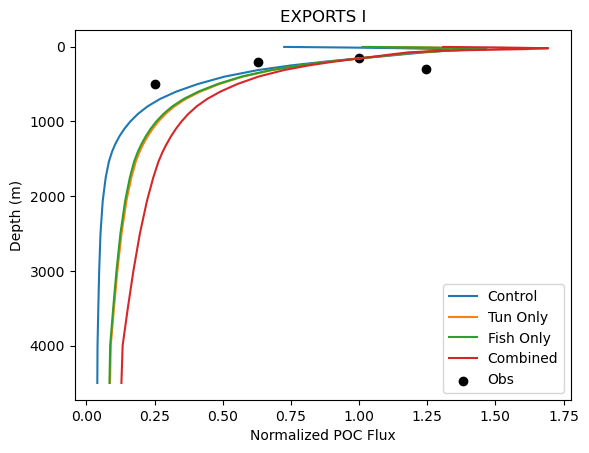

In [23]:
extract_loc_and_plot("EXPORTS I")

In [24]:
remin_file2='/work/jyl/validation_data/Laufkotter_Remin/Dinauer_2022_compilation_withSeasons_combEXPORTS.csv'
remin2=pd.read_csv(remin_file2)
remin2

,Station,Latitude (DD),Longitude (DD),Depth (m),Normalized POC Flux,Season,Data Source
0,Iceland,62.5,-24.5,150,1.000,JJA,Marsay et al. (2015)
1,Iceland,62.5,-24.5,400,0.536,JJA,Marsay et al. (2015)
2,Irminger,60.5,-31.5,150,1.000,JJA,Marsay et al. (2015)
3,Irminger,60.5,-31.5,400,0.339,JJA,Marsay et al. (2015)
4,EXPORTS NP,50.5,-145.5,150,1.000,JAS,EXPORTSNP (https://seabass.gsfc.nasa.gov/)
...,...,...,...,...,...,...,...
109,MAUR,10.5,-20.5,600,0.297,MAM,Engel et al. (2017)
110,PERU,-15.5,-75.5,400,1.000,JJA,Martin et al. (1987)
111,PERU,-15.5,-75.5,600,0.822,JJA,Martin et al. (1987)
112,PERU,-15.5,-75.5,900,0.795,JJA,Martin et al. (1987)


# Pull together and Plot

In [25]:
stn_val_ctrl_dict = {}
stn_val_tun_dict = {}
stn_val_hp_dict = {}
stn_val_tun_hp_dict = {}

for stn in remin.Station.unique():
    # extract locations from obs
    lon=lon_adjust(remin['Longitude (DD)'].where(remin.Station==stn).dropna().unique()[0])
    lat=remin['Latitude (DD)'].where(remin.Station==stn).dropna().unique()[0]
    time_idx=Season_to_Months[remin['Season'].where(remin.Station==stn).dropna().unique()[0]]
    norm_depth=remin['Depth (m)'].where(remin.Station==stn).dropna().values[0]

    if stn=='MX':
        lon = lon-1.0

    # extract grid cell from models
    stn_val_ctrl = expc_ctrl.sel(xh=lon, yh=lat, method='nearest').isel(time=time_idx).mean(dim='time')
    stn_val_tun = expc_tun.sel(xh=lon, yh=lat, method='nearest').isel(time=time_idx).mean(dim='time')
    stn_val_hp = expc_hp.sel(xh=lon, yh=lat, method='nearest').isel(time=time_idx).mean(dim='time')
    stn_val_tun_hp = expc_tun_hp.sel(xh=lon, yh=lat, method='nearest').isel(time=time_idx).mean(dim='time')

    # scale models by the normalization depth from the obs
    stn_val_ctrl_dict[stn] = (stn_val_ctrl / stn_val_ctrl.sel(z_l=norm_depth, method='nearest')).values
    stn_val_tun_dict[stn] = (stn_val_tun / stn_val_tun.sel(z_l=norm_depth, method='nearest')).values
    stn_val_hp_dict[stn] = (stn_val_hp / stn_val_hp.sel(z_l=norm_depth, method='nearest')).values
    stn_val_tun_hp_dict[stn] = (stn_val_tun_hp / stn_val_tun_hp.sel(z_l=norm_depth, method='nearest')).values

In [26]:
stn='EXPORTS NP'
# extract locations from obs
lon=[lon_adjust(remin['Longitude (DD)'].where(remin.Station=='EXPORTS I').dropna().unique()[0]),lon_adjust(remin['Longitude (DD)'].where(remin.Station=='EXPORTS II').dropna().unique()[0])]
lat=remin['Latitude (DD)'].where(remin2.Station==stn).dropna().unique()[0]
time_idx=Season_to_Months[remin['Season'].where(remin2.Station==stn).dropna().unique()[0]]
norm_depth=remin['Depth (m)'].where(remin2.Station==stn).dropna().values[0]

# extract grid cell from models
stn_val_ctrl = expc_ctrl.sel(xh=lon, yh=lat, method='nearest').isel(time=time_idx).mean(dim=['time','xh'])
stn_val_tun = expc_tun.sel(xh=lon, yh=lat, method='nearest').isel(time=time_idx).mean(dim=['time','xh'])
stn_val_hp = expc_hp.sel(xh=lon, yh=lat, method='nearest').isel(time=time_idx).mean(dim=['time','xh'])
stn_val_tun_hp = expc_tun_hp.sel(xh=lon, yh=lat, method='nearest').isel(time=time_idx).mean(dim=['time','xh'])

# scale models by the normalization depth from the obs
stn_val_ctrl_dict[stn] = (stn_val_ctrl / stn_val_ctrl.sel(z_l=norm_depth, method='nearest')).values
stn_val_tun_dict[stn] = (stn_val_tun / stn_val_tun.sel(z_l=norm_depth, method='nearest')).values
stn_val_hp_dict[stn] = (stn_val_hp / stn_val_hp.sel(z_l=norm_depth, method='nearest')).values
stn_val_tun_hp_dict[stn] = (stn_val_tun_hp / stn_val_tun_hp.sel(z_l=norm_depth, method='nearest')).values

In [28]:
stn_val_ctrl_dict['EXPORTS I']

array([0.7254497 , 0.9440778 , 1.1603029 , 1.3153119 , 1.3315088 ,
       1.2411516 , 1.1673684 , 1.0965937 , 1.        , 0.8732702 ,
       0.7507728 , 0.6290588 , 0.5066181 , 0.40791896, 0.3300736 ,
       0.26952925, 0.22374545, 0.18879673, 0.16120431, 0.13901065,
       0.12095403, 0.10636862, 0.09455256, 0.08252659, 0.07085647,
       0.05992347, 0.05173485, 0.04689445, 0.04371738, 0.04081995,
       0.04009701,        nan,        nan,        nan,        nan],
      dtype=float32)

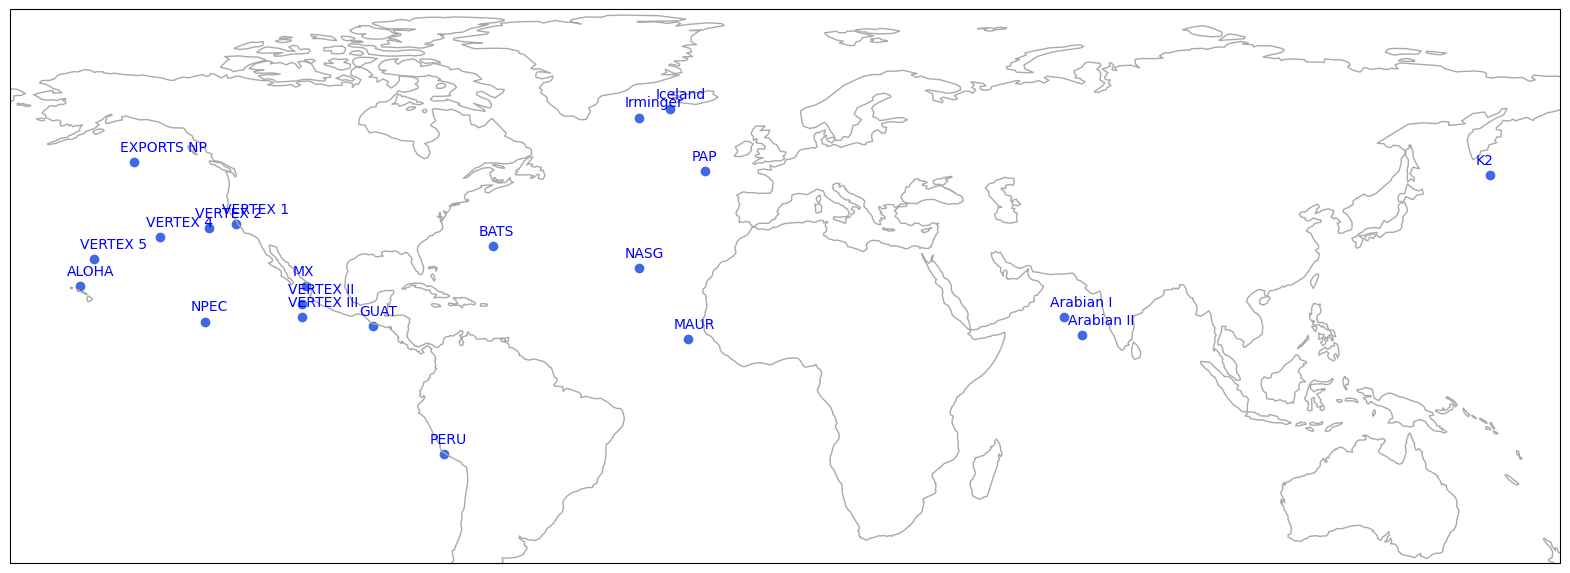

In [29]:
locs=remin2.drop_duplicates(subset=['Station','Longitude (DD)','Latitude (DD)'])
locs=locs[['Station','Longitude (DD)','Latitude (DD)']]
locs=locs.reset_index(drop=True).set_index('Station')

plt.figure(figsize=(20,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(color='darkgrey')

plt.scatter(x=locs['Longitude (DD)'], y=locs['Latitude (DD)'], color='royalblue')

for x, y in locs.iterrows():
    ax.annotate(x, y,
                xytext=(-10,8), textcoords='offset points', color='blue')
    
plt.ylim((-40,85))
plt.savefig('plots/Dinauer_Export_Sites.png', bbox_inches='tight')

In [30]:
depths=expc_ctrl.z_l.values

In [31]:
colors=['#000000', '#05A8AA', '#D7B49E', '#BC412B']

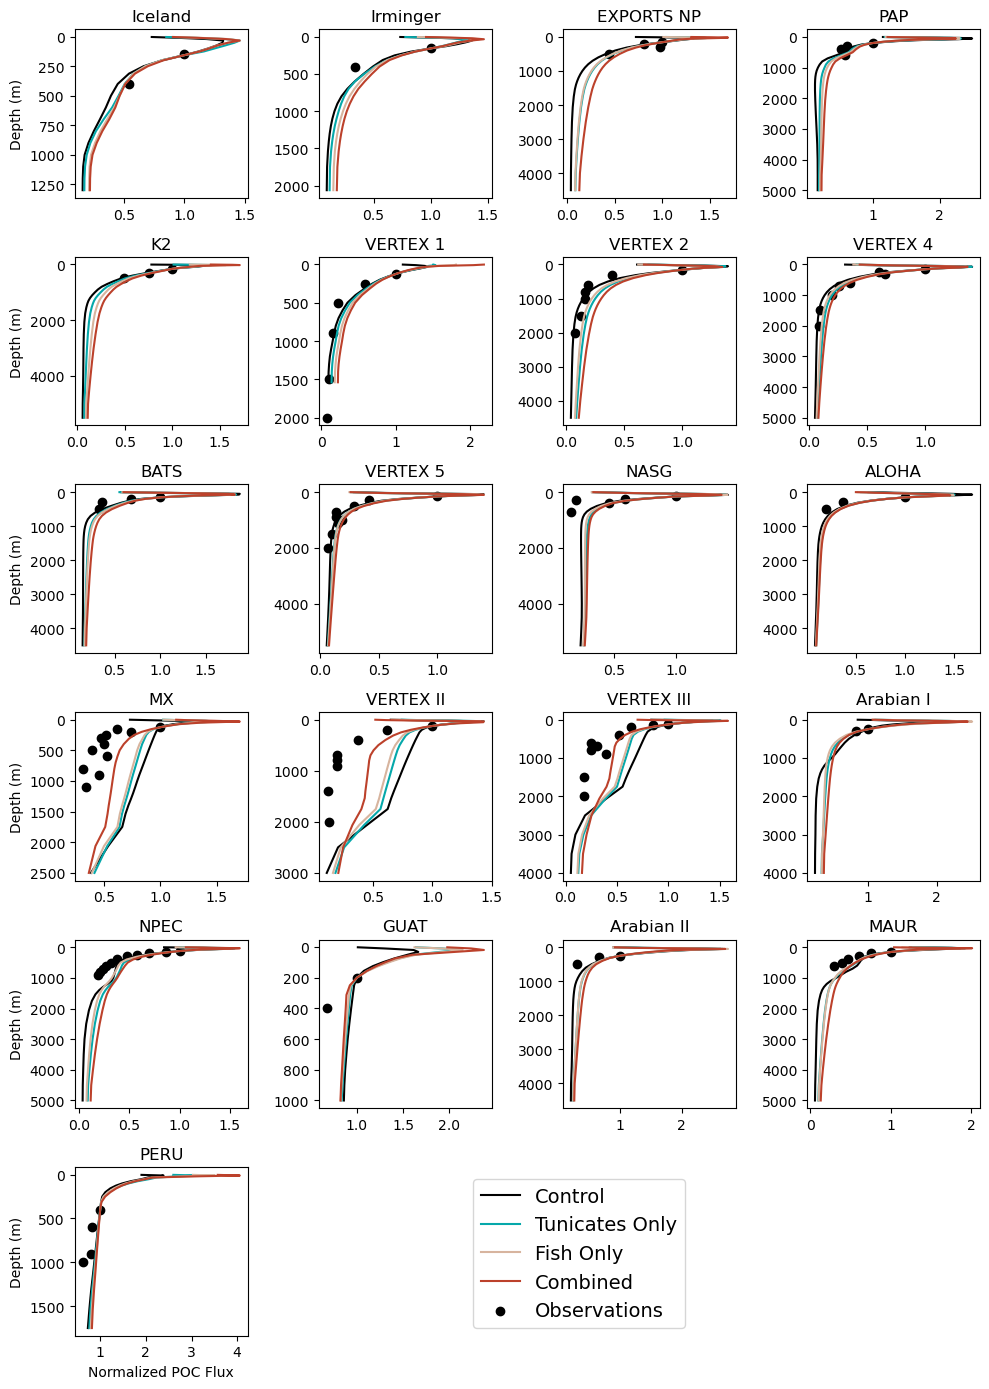

In [32]:
# make dict for axes
axs = {}
stations=remin2.Station.unique()

# given length  of data, make square grid of subplots
#n = 10
n = len(stations)
nrows = 6#int(np.ceil(np.sqrt(n)))
ncols = 4#int(np.ceil(np.sqrt(n)))

# now plot each plot_data[i] in a subplot
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 14))

for i, ax in enumerate(axes.flatten()):
    
    # if i is less than n, plot the data
    if i < n:
        stn=stations[i]
        
        # plot
        ax.plot(stn_val_ctrl_dict[stn],depths,c=colors[0])
        ax.plot(stn_val_tun_dict[stn],depths,c=colors[1])
        ax.plot(stn_val_hp_dict[stn],depths,c=colors[2])
        ax.plot(stn_val_tun_hp_dict[stn],depths,c=colors[3])

        ax.scatter(x=remin2.where(remin2.Station==stn)['Normalized POC Flux'],y=remin2.where(remin2.Station==stn)['Depth (m)'], marker='o', color='black')
        #ax.set_ylabel('Depth (m)')
        #ax.set_xlabel('Normalized POC Flux')
        ax.invert_yaxis()
        #ax.legend(['Control','Tun Only', 'Fish Only', 'Combined', 'Obs'])
        ax.set_title(stn)

    # otherwise, remove the axis
    else:
        ax.axis('off')

for ax in axes[-1,:]:
    ax.set_xlabel('Normalized POC Flux')
for ax in axes[:,0]:
    ax.set_ylabel('Depth (m)')
    
plt.tight_layout()
fig.legend(['Control','Tunicates Only', 'Fish Only', 'Combined', 'Observations'], fontsize=14, loc="lower right", bbox_to_anchor=(0.7, 0.04))

plt.savefig('plots/Export_flux_comparisons.png', dpi=300, bbox_inches='tight')

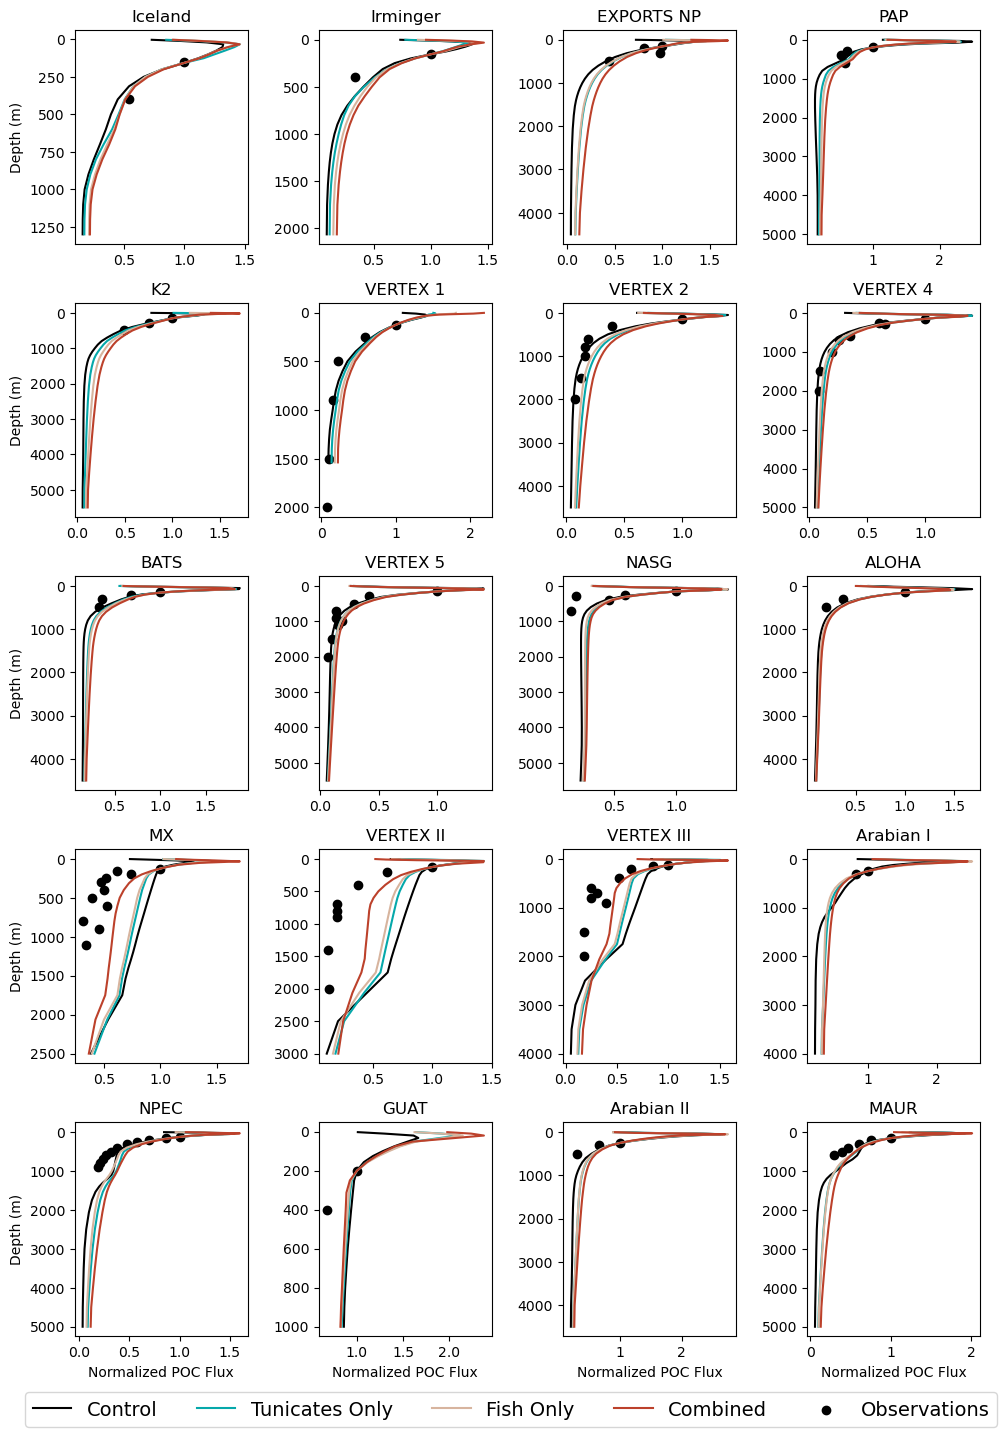

In [33]:
# make dict for axes
axs = {}
stations=remin2.Station.unique()

# given length  of data, make square grid of subplots
#n = 10
n = len(stations)
nrows = 5#int(np.ceil(np.sqrt(n)))
ncols = 4#int(np.ceil(np.sqrt(n)))

# now plot each plot_data[i] in a subplot
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 14))

for i, ax in enumerate(axes.flatten()):
    
    # if i is less than n, plot the data
    if i < n:
        stn=stations[i]
        
        # plot
        ax.plot(stn_val_ctrl_dict[stn],depths,c=colors[0])
        ax.plot(stn_val_tun_dict[stn],depths,c=colors[1])
        ax.plot(stn_val_hp_dict[stn],depths,c=colors[2])
        ax.plot(stn_val_tun_hp_dict[stn],depths,c=colors[3])

        ax.scatter(x=remin2.where(remin2.Station==stn)['Normalized POC Flux'],y=remin2.where(remin2.Station==stn)['Depth (m)'], marker='o', color='black')
        #ax.set_ylabel('Depth (m)')
        #ax.set_xlabel('Normalized POC Flux')
        ax.invert_yaxis()
        #ax.legend(['Control','Tun Only', 'Fish Only', 'Combined', 'Obs'])
        ax.set_title(stn)

    # otherwise, remove the axis
    else:
        ax.axis('off')

for ax in axes[-1,:]:
    ax.set_xlabel('Normalized POC Flux')
for ax in axes[:,0]:
    ax.set_ylabel('Depth (m)')
    
fig.legend(['Control','Tunicates Only', 'Fish Only', 'Combined', 'Observations'], fontsize=14, loc="lower left", ncol=5, bbox_to_anchor=(0.02, -0.03))
plt.tight_layout()

#plt.savefig('plots/Export_flux_comparisons_ReducedStns.png', dpi=300, bbox_inches='tight')

## Calculate RSME, bias, correlation

In [34]:
stn_pt_ctrl_dict = {}
stn_pt_tun_dict = {}
stn_pt_hp_dict = {}
stn_pt_tun_hp_dict = {}

for stn in remin.Station.unique():
    # extract locations from obs
    lon=lon_adjust(remin['Longitude (DD)'].where(remin.Station==stn).dropna().unique()[0])
    lat=remin['Latitude (DD)'].where(remin.Station==stn).dropna().unique()[0]
    time_idx=Season_to_Months[remin['Season'].where(remin.Station==stn).dropna().unique()[0]]
    depths=remin['Depth (m)'].where(remin.Station==stn).dropna().unique()
    norm_depth=remin['Depth (m)'].where(remin.Station==stn).dropna().values[0]

    if stn=='MX':
        lon = lon-1.0

    # extract grid cell from models
    stn_pt_ctrl = expc_ctrl.sel(xh=lon, yh=lat, z_l=depths, method='nearest').isel(time=time_idx).mean(dim='time')
    stn_pt_tun = expc_tun.sel(xh=lon, yh=lat, z_l=depths, method='nearest').isel(time=time_idx).mean(dim='time')
    stn_pt_hp = expc_hp.sel(xh=lon, yh=lat, z_l=depths, method='nearest').isel(time=time_idx).mean(dim='time')
    stn_pt_tun_hp = expc_tun_hp.sel(xh=lon, yh=lat, z_l=depths, method='nearest').isel(time=time_idx).mean(dim='time')

    # scale models by the normalization depth from the obs
    stn_pt_ctrl_dict[stn] = (stn_pt_ctrl / stn_pt_ctrl.sel(z_l=norm_depth, method='nearest')).values
    stn_pt_tun_dict[stn] = (stn_pt_tun / stn_pt_tun.sel(z_l=norm_depth, method='nearest')).values
    stn_pt_hp_dict[stn] = (stn_pt_hp / stn_pt_hp.sel(z_l=norm_depth, method='nearest')).values
    stn_pt_tun_hp_dict[stn] = (stn_pt_tun_hp / stn_pt_tun_hp.sel(z_l=norm_depth, method='nearest')).values

In [36]:
stn='EXPORTS NP'
# extract locations from obs
lon=[lon_adjust(remin['Longitude (DD)'].where(remin.Station=='EXPORTS I').dropna().unique()[0]),lon_adjust(remin['Longitude (DD)'].where(remin.Station=='EXPORTS II').dropna().unique()[0])]
lat=remin['Latitude (DD)'].where(remin2.Station==stn).dropna().unique()[0]
time_idx=Season_to_Months[remin['Season'].where(remin2.Station==stn).dropna().unique()[0]]
depths=remin['Depth (m)'].where(remin2.Station==stn).dropna().unique()
norm_depth=remin['Depth (m)'].where(remin2.Station==stn).dropna().values[0]

# extract grid cell from models
stn_pt_ctrl = expc_ctrl.sel(xh=lon, yh=lat, z_l=depths, method='nearest').isel(time=time_idx).mean(dim=['time','xh'])
stn_pt_tun = expc_tun.sel(xh=lon, yh=lat, z_l=depths, method='nearest').isel(time=time_idx).mean(dim=['time','xh'])
stn_pt_hp = expc_hp.sel(xh=lon, yh=lat, z_l=depths, method='nearest').isel(time=time_idx).mean(dim=['time','xh'])
stn_pt_tun_hp = expc_tun_hp.sel(xh=lon, yh=lat, z_l=depths, method='nearest').isel(time=time_idx).mean(dim=['time','xh'])

# scale models by the normalization depth from the obs
stn_pt_ctrl_dict[stn] = (stn_pt_ctrl / stn_pt_ctrl.sel(z_l=norm_depth, method='nearest')).values
stn_pt_tun_dict[stn] = (stn_pt_tun / stn_pt_tun.sel(z_l=norm_depth, method='nearest')).values
stn_pt_hp_dict[stn] = (stn_pt_hp / stn_pt_hp.sel(z_l=norm_depth, method='nearest')).values
stn_pt_tun_hp_dict[stn] = (stn_pt_tun_hp / stn_pt_tun_hp.sel(z_l=norm_depth, method='nearest')).values

In [37]:
stn_pt_dict={}
stn_pt_dict['ctrl']=stn_pt_ctrl_dict
stn_pt_dict['tun']=stn_pt_tun_dict
stn_pt_dict['hp']=stn_pt_hp_dict
stn_pt_dict['tun_hp']=stn_pt_tun_hp_dict

In [38]:
# build dict
ptStats={}
for expt in ['ctrl','tun','hp','tun_hp']:
    ptStats[expt]={}
    for stn in remin2.Station.unique():
        ptStats[expt][stn]={}
        for metrics in ['corr','bias','rmse']:
            ptStats[expt][stn][metrics]=0

In [39]:
import scipy.stats as stats

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [40]:
for stn in remin2.Station.unique():
    obs = remin2.where(remin2.Station==stn)['Normalized POC Flux'].dropna().values
    for expt in ['ctrl','tun','hp','tun_hp']:
        model = stn_pt_dict[expt][stn]
        mask = np.logical_and(~np.isnan(model),~np.isnan(obs))

        ptStats[expt][stn]['bias'] = np.mean(model[mask]-obs[mask])
        ptStats[expt][stn]['rmse'] = rmse(model[mask],obs[mask])
        
        corr = stats.pearsonr(model[mask],obs[mask])[0]
        if (corr != 1.0):
            ptStats[expt][stn]['corr'] = corr
        else:
            ptStats[expt][stn]['corr'] = np.nan

In [41]:
df=pd.DataFrame.from_dict(ptStats).stack().to_frame()
df=pd.DataFrame(df[0].values.tolist(), index=df.index)

df

corr      bias      rmse
Iceland  ctrl         NaN -0.045086  0.063761
         tun          NaN -0.016307  0.023061
         hp           NaN -0.014888  0.021054
         tun_hp       NaN -0.013610  0.019248
Irminger ctrl         NaN  0.077231  0.109221
...                   ...       ...       ...
MAUR     tun_hp  0.988920  0.131250  0.146279
PERU     ctrl    0.920822  0.120962  0.151506
         tun     0.920490  0.128838  0.160583
         hp      0.920300  0.137393  0.170544
         tun_hp  0.917718  0.142946  0.177131

[84 rows x 3 columns]

In [51]:
dfm=pd.melt(df.reset_index(names=['station','expt']),id_vars=['station','expt'], var_name='metric')
dfm

,station,expt,metric,value
0,Iceland,ctrl,corr,NaN
1,Iceland,tun,corr,NaN
2,Iceland,hp,corr,NaN
3,Iceland,tun_hp,corr,NaN
4,Irminger,ctrl,corr,NaN
...,...,...,...,...
247,MAUR,tun_hp,rmse,0.146279
248,PERU,ctrl,rmse,0.151506
249,PERU,tun,rmse,0.160583
250,PERU,hp,rmse,0.170544


In [52]:
dfm.to_csv('data/point_comparisons_stats.csv')

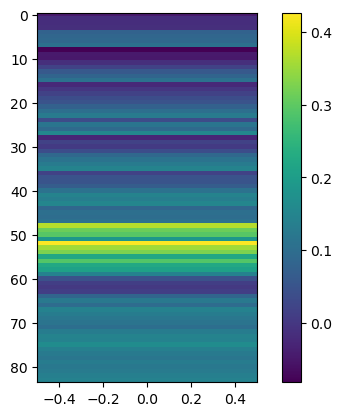

In [129]:
plt.imshow(pd.DataFrame(df['bias']), aspect=0.02)
plt.colorbar()